## **K = 784, 512, 256, 128, 64, 32 에 대한 Plot 생성**

### 1. epoch 에 따른 Accuracy

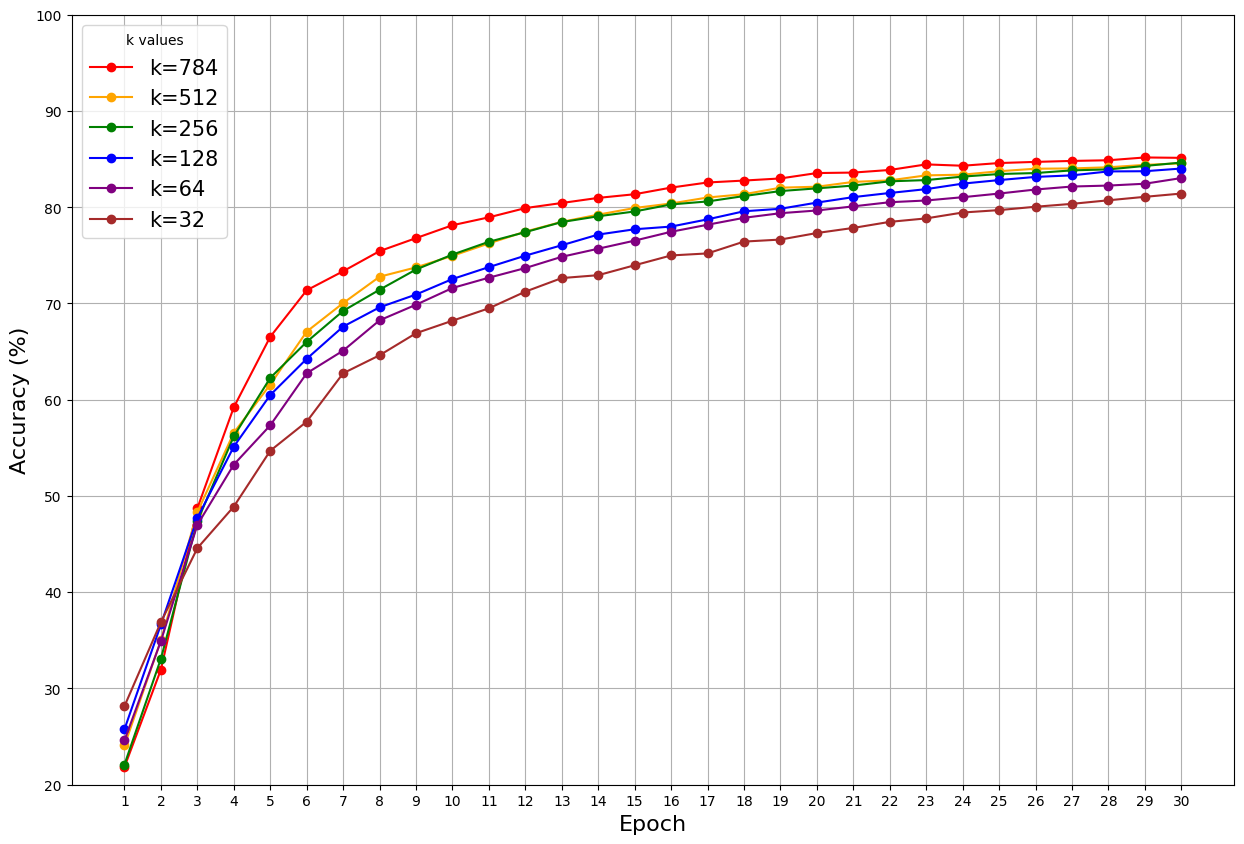

In [17]:
import matplotlib.pyplot as plt
import re

k_values = [784, 512, 256, 128, 64, 32]
colors = ['red', 'orange', 'green', 'blue', 'purple', 'brown']
epochs = 30

plt.figure(figsize=(15, 10))
for k, color in zip(k_values, colors):
    file_path = f"./results/{k}/report_{k}.txt"
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    matches = re.findall(r"Epoch\s+(\d+)\s+AVG Acc:\s*([0-9.]+)", content)
    acc_dict = {int(ep): float(acc)*100 for ep, acc in matches}
    acc_list = [acc_dict.get(ep, 0) for ep in range(1, epochs+1)]
    plt.plot(range(1, epochs+1), acc_list, marker='o', color=color, label=f"k={k}")

plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy (%)")
plt.ylabel("Accuracy (%)", fontsize=16)
plt.xticks(range(1, epochs+1))
plt.ylim(20, 100)
plt.legend(title="k values", fontsize=15)
plt.grid(True)
plt.savefig("./results/epoch_accuracy_plot_new.png", bbox_inches="tight")
plt.show()

### 2. k에 따른 수행시간 비교

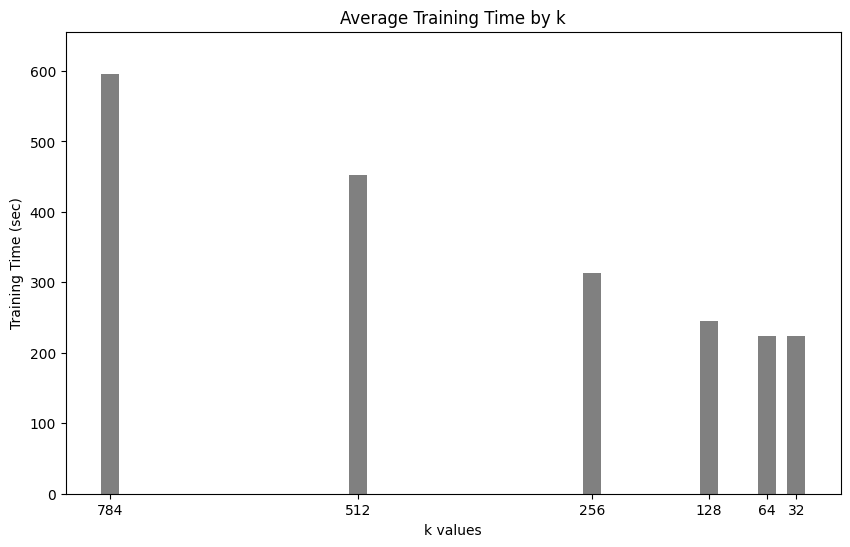

In [19]:
training_times = []
for k in k_values:
    file_path = f"./results/{k}/report_{k}.txt"
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    match = re.search(r"Average Training Time \(초\):\s*([0-9.]+)", content)
    time_val = float(match.group(1)) if match else 0
    training_times.append(time_val)

max_time = max(training_times)

plt.figure(figsize=(10,6))
plt.bar(k_values, training_times, width=20, color='grey')
plt.ylim(0, max_time*1.1)
plt.xlabel("k values")
plt.ylabel("Training Time (sec)")
plt.title("Average Training Time by k")
plt.xticks(k_values, [f"{k}" for k in k_values])
plt.gca().invert_xaxis()
plt.savefig("./results/avg_training_time_plot.png", bbox_inches="tight")
plt.show()

### 3. k에 따른 모델사이즈 비교

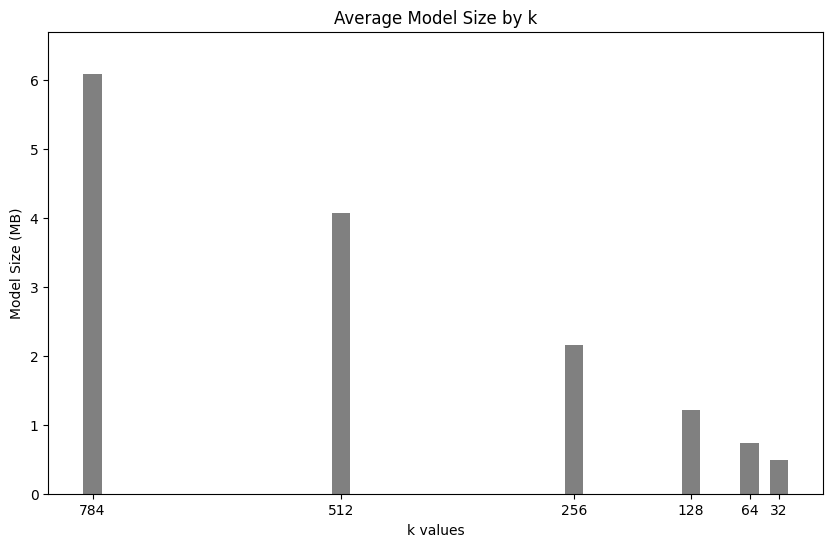

In [20]:
model_sizes = []
for k in k_values:
    file_path = f"./results/{k}/report_{k}.txt"
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
    match = re.search(r"Average Model Size \(MB\):\s*([0-9.]+)", content)
    size_mb = float(match.group(1)) if match else 0
    model_sizes.append(size_mb)

max_size = max(model_sizes)

plt.figure(figsize=(10,6))
plt.bar(k_values, model_sizes, width=20, color='grey')
plt.ylim(0, max_size*1.1)
plt.xlabel("k values")
plt.ylabel("Model Size (MB)")
plt.title("Average Model Size by k")
plt.xticks(k_values, [f"{k}" for k in k_values])
plt.gca().invert_xaxis()
plt.savefig("./results/avg_model_size_plot.png", bbox_inches="tight")
plt.show()

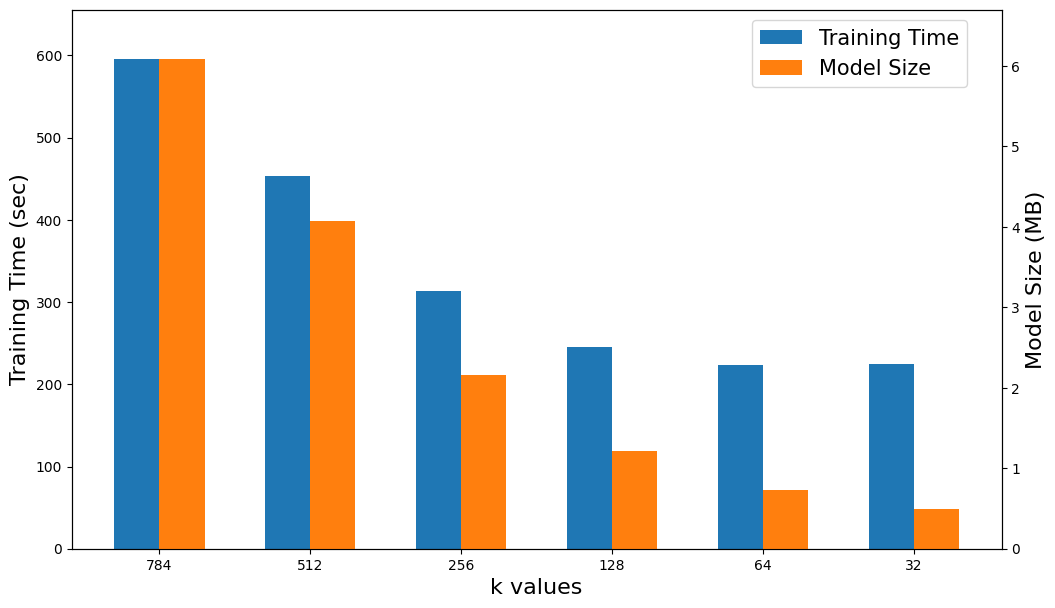

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(k_values))
bar_width = 0.3

fig, ax1 = plt.subplots(figsize=(12, 7))

# Training Time (왼쪽 y축)
color1 = '#1f77b4'  # 파란색
ax1.set_xlabel('k values', fontsize=16)
ax1.set_ylabel('Training Time (sec)', fontsize=16)
ax1.bar(x, training_times, width=bar_width, label='Training Time', color=color1)
ax1.tick_params(axis='y', colors='black')  # y축 숫자 검정색
ax1.set_ylim(0, max(training_times) * 1.1)

# Model Size (오른쪽 y축)
ax2 = ax1.twinx()
color2 = '#ff7f0e'  # 주황색
ax2.set_ylabel('Model Size (MB)', fontsize=16)
ax2.bar(x + bar_width, model_sizes, width=bar_width, label='Model Size', color=color2)
ax2.tick_params(axis='y', colors='black')  # y축 숫자 검정색
ax2.set_ylim(0, max(model_sizes) * 1.1)

# x축 설정
plt.xticks(x + bar_width / 2, [str(k) for k in k_values])  # bar 쌍의 중앙에 tick
ax1.invert_xaxis()

# 제목
# plt.title("Training Time & Model Size per k")
plt.gca().invert_xaxis()
# 범례
fig.legend(loc="upper right", bbox_to_anchor=(0.88, 0.88), fontsize=15)

# 저장
plt.savefig("./results/training_time_and_model_size_new.png", bbox_inches="tight")
plt.show()
